# 10 epoch results

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import torch, torchvision
import mmcv
from mmcv import Config
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
import mmaction
from mmaction.apis import inference_recognizer, init_recognizer
from mmaction.datasets import build_dataset
from matplotlib import pyplot as plt
from mmaction.core import confusion_matrix

import numpy as np
import decord as de
import cv2

In [14]:
k = 1
dataset_dir = 'F:/ETRI-Activity3D/RGB Videos/EtriActivity3D'
dataset_name = 'EtriActivity3D'
cfg = mmcv.Config.fromfile('mmaction2/configs/recognition/timesformer/timesformer_divST_8x32x1 - modified pipeline.py')
cfg.ann_file_val =  dataset_dir + '/' + dataset_name + '_test_k' + str(k) + '_video.txt'
cfg.data.val.type = 'VideoDataset'
cfg.data.val.ann_file = dataset_dir + '/' + dataset_name + '_test_k' + str(k) + '_video.txt'
cfg.data.val.data_prefix = dataset_dir + '/all_videos/'
cfg.ann_file_test =  dataset_dir + '/' + dataset_name + '_test_k' + str(k) + '_video.txt'
cfg.data.test.type = 'VideoDataset'
cfg.data.test.ann_file = dataset_dir + '/' + dataset_name + '_test_k' + str(k) + '_video.txt'
cfg.data.test.data_prefix = dataset_dir + '/all_videos/'

checkpoint = 'training_logs/3r entrenament/epoch_10.pth'
model = init_recognizer(cfg, checkpoint, device='cuda:0')
labels = [x.strip() for x in open("label_map_EtriActivity3D.txt").readlines()]

load checkpoint from local path: training_logs/3r entrenament/epoch_10.pth


In [15]:
results_file = 'training_logs/3r entrenament/results_epoch10.json'
metrics = ['top_k_accuracy', 'mean_class_accuracy', 'class_accuracy']
kwargs = {} # Eval options

In [16]:
def get_kwargs(cfg):
    eval_kwargs = cfg.get('evaluation', {}).copy()
    # hard-code way to remove EvalHook args
    for key in [
            'interval', 'tmpdir', 'start', 'gpu_collect', 'save_best', 'rule',
            'by_epoch'
    ]:
        eval_kwargs.pop(key, None)
    return eval_kwargs

def print_metric(cfg, metric, outputs):
    eval_kwargs = get_kwargs(cfg)
    eval_kwargs.update(dict(metrics=metric, **kwargs))
    return dataset.evaluate(outputs, **eval_kwargs)


Evaluating top_k_accuracy ...

top1_acc	0.9591
top5_acc	0.9985

Evaluating mean_class_accuracy ...

mean_acc	0.9578

Evaluating class_accuracy ...

class_acc	[0.9310344827586207, 0.9365079365079365, 0.919908466819222, 0.9404255319148936, 1.0, 0.9233128834355828, 0.9316770186335404, 0.9941690962099126, 0.9226190476190477, 0.9692982456140351, 0.6975308641975309, 0.987012987012987, 0.9857142857142858, 0.959051724137931, 0.954337899543379, 0.9816326530612245, 0.9976415094339622, 0.9871244635193133, 0.9956803455723542, 1.0, 0.9539748953974896, 0.9009009009009009, 1.0, 0.9962406015037594, 0.9880597014925373, 0.9901185770750988, 1.0, 0.6189024390243902, 1.0, 0.972768532526475, 0.9565217391304348, 0.9851694915254238, 1.0, 0.9628482972136223, 0.936247723132969, 0.9695817490494296, 0.984375, 0.9297658862876255, 0.9566563467492261, 0.9502923976608187, 0.9903846153846154, 0.9903846153846154, 0.9919839679358717, 1.0, 0.997275204359673, 1.0, 1.0, 0.9665271966527197, 0.95, 0.9358974358974359, 0.9877

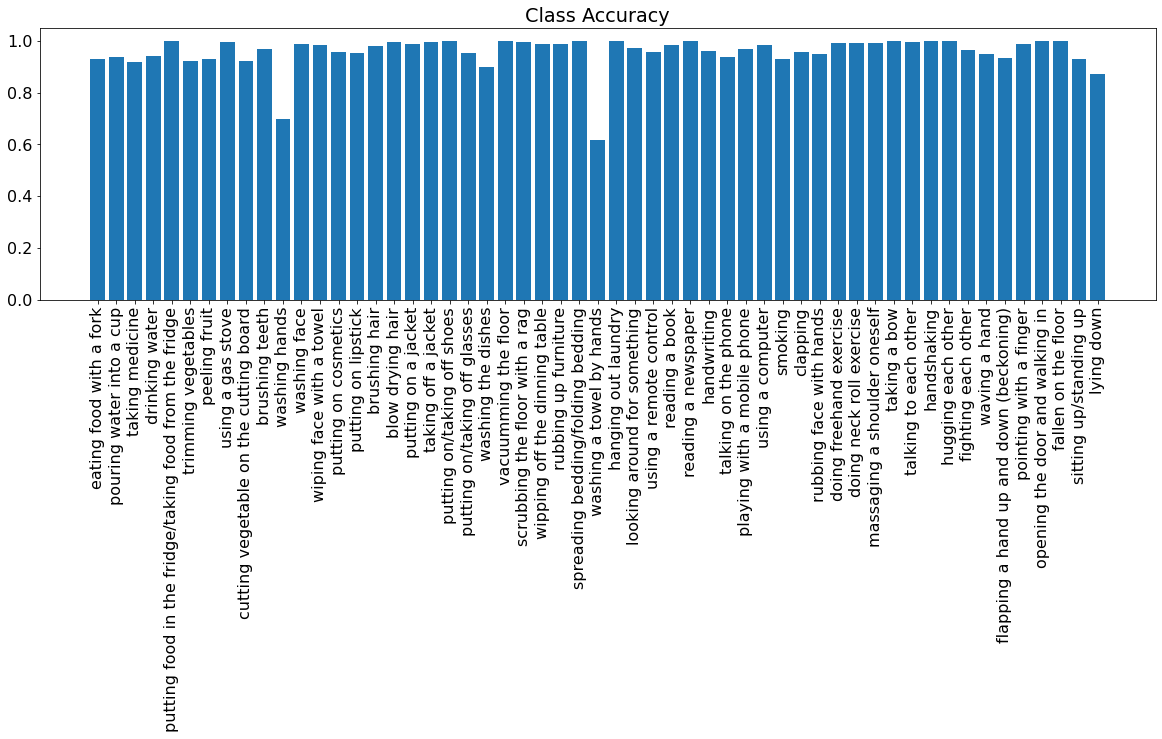

In [17]:
dataset = build_dataset(cfg.data.test)
outputs = mmcv.load(results_file)
res = {}
for metric in metrics:
    res.update(print_metric(cfg, metric, outputs))
    
# Plot per class accuracy
plt.rcParams['figure.figsize'] = [20, 5]
plt.rcParams['font.size'] = 16
plt.bar(height=res['class_accuracy'], x=labels)
plt.xticks(labels, rotation=90)
plt.title("Class Accuracy")
plt.show()

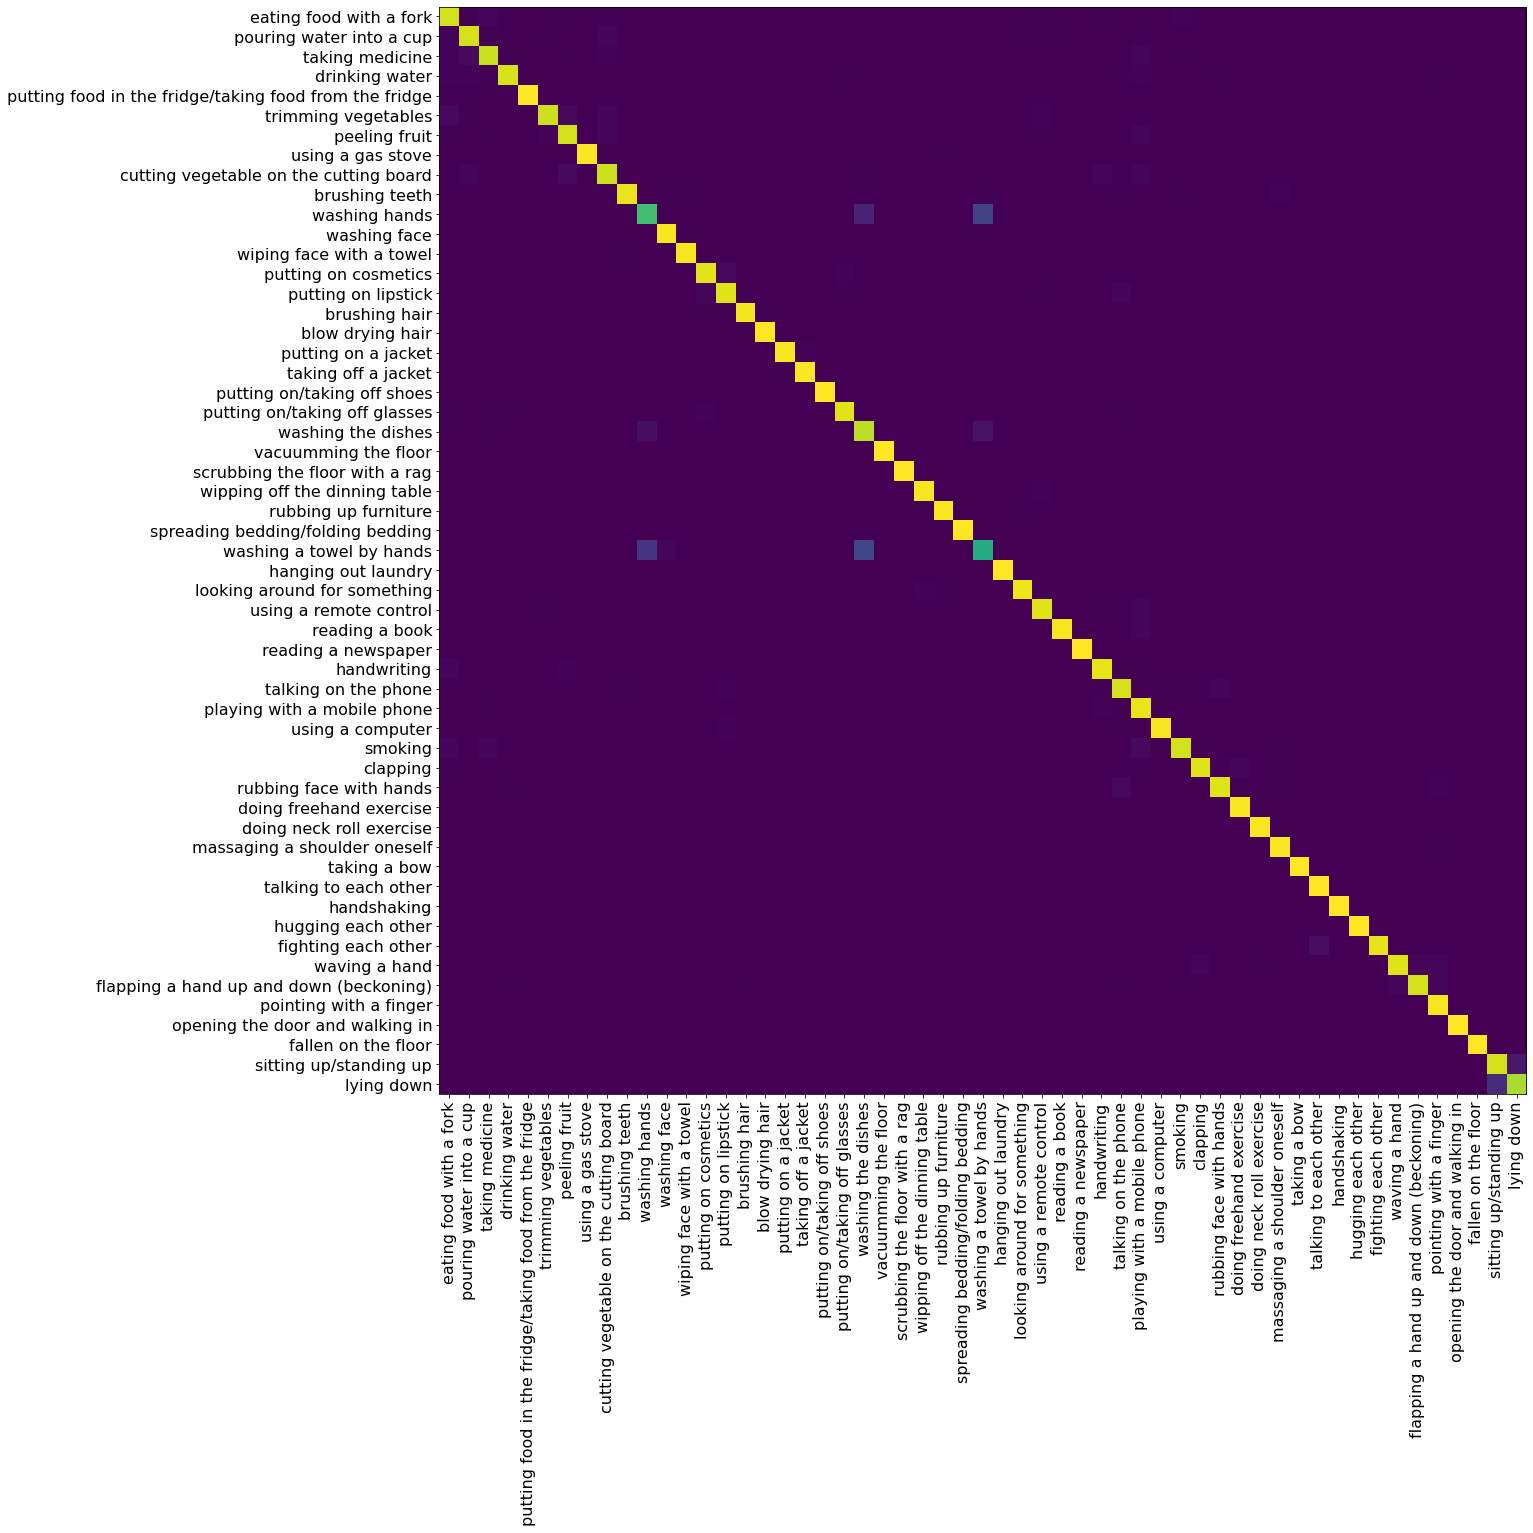

In [40]:
plt.rcParams['figure.figsize'] = [20, 20]
plt.rcParams['font.size'] = 16
plt.imshow(confusion_matrix(np.argmax(outputs, axis=1), [ann['label'] for ann in dataset.video_infos], 'true'))
plt.xticks(range(len(labels)), labels, rotation=90)
plt.yticks(range(len(labels)), labels)
plt.show()

In [50]:
cm = confusion_matrix(np.argmax(outputs, axis=1), [ann['label'] for ann in dataset.video_infos])

# Wash hands
# Wash towel by hands
print(cm[10, 27])
print(cm[27, 10])
print()

# Wash dishes
# Wash towel by hands
print(cm[21, 27])
print(cm[27, 21])
print()

# Wash hands
# Wash dishes
print(cm[21, 10])
print(cm[10, 21])
print()

# Sitting up/standing up
# Lying down
print(cm[53, 54])
print(cm[54, 53])

66
50

16
68

12
31

31
59
